In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [ ]:
#Read the anime file
anime=pd.read_csv('/content/animes.csv')
anime.head()
#removing the null values from the dataset
anime=anime.dropna()


In [ ]:
#reading the profile and reviews file
profile=pd.read_csv('/content/profile.csv')
reviews=pd.read_csv('/content/reviews.csv')
profile.head()

,Unnamed: 0,profile,gender,birthday,favorites_anime,link
0,0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
1,1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans
2,2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99


In [ ]:
#identifying the datatype of each column in the dataset
anime['uid']=anime['uid'].astype(str)
print(anime.dtypes)
#anime and reviews datasets are merging
a_reviews=anime.merge(reviews,on='uid')
a_reviews=a_reviews[:300]

Unnamed: 0      int64
uid            object
title          object
synopsis       object
genre          object
aired          object
episodes      float64
members         int64
popularity      int64
ranked        float64
score         float64
img_url        object
link           object
dtype: object


In [ ]:
#merging the datasets of profiles and reviews
a_prof_rev=a_reviews.merge(profile,on='profile')
a_prof_rev=a_prof_rev[:300]
#checking if there are any missing values in dataset or not
a_prof_rev.isna().sum()
#removes the rows that contains NULL values
a_prof_rev.dropna(axis=1,how='all',inplace=True)
#overwriting the file after removing the NULL values
a_prof_rev.dropna(inplace=True)
#removes the unnamed columns in the dataset
a_prof_rev.drop('Unnamed: 0_x',inplace=True,axis=1)
#removes the 'score_x' column from the DataFrame
a_prof_rev.drop('score_x',inplace=True,axis=1)
#removes the 'img_url' column from the DataFrame
a_prof_rev.drop('img_url',inplace=True,axis=1)
#removes the 'link_x' column from the DataFrame
a_prof_rev.drop('link_x',inplace=True,axis=1)
#removes the 'Unnamed: 0_y' column from the DataFrame
a_prof_rev.drop('Unnamed: 0_y',inplace=True,axis=1)
#removes the 'profile' column from the DataFrame
a_prof_rev.drop('profile',inplace=True,axis=1)
#removes the 'anime_uid' column from the DataFrame
a_prof_rev.drop('anime_uid',inplace=True,axis=1)
#removes the 'text' column from the DataFrame
a_prof_rev.drop('text',inplace=True,axis=1)
#removes the 'score_y' column from the DataFrame
a_prof_rev.drop('score_y',inplace=True,axis=1)
#removes the 'link_y' column from the DataFrame
a_prof_rev.drop('link_y',inplace=True,axis=1)
#removes the 'Unnamed: 0' column from the DataFrame
a_prof_rev.drop('Unnamed: 0',inplace=True,axis=1)
#removes the 'birthday' column from the DataFrame
a_prof_rev.drop('birthday',inplace=True,axis=1)
#removes the 'img_url' column from the DataFrame and it overwrites
a_prof_rev.drop('favorites_anime',inplace=True,axis=1)
#finding the number of missing values in eacch column
a_prof_rev.isna().sum()
a_prof_rev

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,scores,gender,link
1,440,Shoujo Kakumei Utena,After meeting a traveling prince who consoled ...,"['Comedy', 'Drama', 'Fantasy', 'Mystery', 'Psy...","Apr 2, 1997 to Dec 24, 1997",39.0,130172,866,347.0,"{'Overall': '8', 'Story': '6', 'Animation': '1...",Male,https://myanimelist.net/profile/Lance20000
2,2581,Mobile Suit Gundam 00,"In the distant future, mankind's dependence on...","['Action', 'Military', 'Sci-Fi', 'Space', 'Dra...","Oct 6, 2007 to Mar 29, 2008",25.0,164162,672,327.0,"{'Overall': '6', 'Story': '6', 'Animation': '5...",Male,https://myanimelist.net/profile/ZetaZaku
7,9734,K-On!!: Keikaku!,"The summer holidays are coming to an end, but ...","['Comedy', 'Music', 'School', 'Slice of Life']","Mar 16, 2011",1.0,77561,1385,766.0,"{'Overall': '9', 'Story': '8', 'Animation': '8...",Male,https://myanimelist.net/profile/Cyberfire777
9,8723,Anime Rakugo Kan,A collection of 8 stand-alone stories told in ...,['Comedy'],"Jul 5, 1992 to 1992",8.0,525,10884,8200.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",Male,https://myanimelist.net/profile/Greiver
11,15743,Yuugen Kaisha: Jiken File 00 - Hajimari wa Aya...,Prologue episode. The first half features main...,"['Adventure', 'Comedy', 'Supernatural']","Jul 25, 1994",1.0,530,10872,9618.0,"{'Overall': '8', 'Story': '8', 'Animation': '9...",Male,https://myanimelist.net/profile/alex264
...,...,...,...,...,...,...,...,...,...,...,...,...
105,20555,SoniAni: Super Sonico The Animation,"Super Sonico is a clutzy, adorable, and well-e...","['Music', 'Slice of Life']","Jan 6, 2014 to Mar 24, 2014",12.0,63243,1610,7720.0,"{'Overall': '3', 'Story': '2', 'Animation': '4...",Female,https://myanimelist.net/profile/Catnis
107,4375,Kyoro-chan,"While exploring ruins on Angel Island, a docto...","['Adventure', 'Comedy', 'Fantasy']","Jul 1, 1999 to Mar 29, 2001",91.0,1816,8171,2553.0,"{'Overall': '7', 'Story': '9', 'Animation': '1...",Female,https://myanimelist.net/profile/bitsypookums24
108,34279,Grancrest Senki,The continent of Atlatan once again finds itse...,"['Action', 'Drama', 'Fantasy', 'Romance']","Jan 6, 2018 to Jun 23, 2018",24.0,152336,729,2500.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",Female,https://myanimelist.net/profile/heatherbear
109,1441,Ginga Tetsudou no Yoru,Giovanni is a young boy who lives on the outsk...,"['Drama', 'Fantasy', 'Historical', 'Kids', 'My...","Jul 13, 1985",1.0,13804,3796,2446.0,"{'Overall': '8', 'Story': '8', 'Animation': '9...",Male,https://myanimelist.net/profile/amaity


In [ ]:
#describing the dataset
a_prof_rev.describe()

,episodes,members,popularity,ranked
count,80.00000,80.000000,80.000000,80.000000
mean,12.93750,18104.525000,7690.112500,6865.950000
std,27.89553,36711.793631,4472.102221,3960.572392
min,1.00000,64.000000,672.000000,327.000000
25%,1.00000,413.250000,3779.500000,3291.750000
50%,1.00000,2490.500000,7430.000000,6905.500000
75%,12.25000,13959.500000,11414.750000,10146.750000
max,191.00000,164162.000000,15995.000000,14095.000000


In [ ]:
#providing the detailed information of the dataset
a_prof_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 1 to 113
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         80 non-null     object 
 1   title       80 non-null     object 
 2   synopsis    80 non-null     object 
 3   genre       80 non-null     object 
 4   aired       80 non-null     object 
 5   episodes    80 non-null     float64
 6   members     80 non-null     int64  
 7   popularity  80 non-null     int64  
 8   ranked      80 non-null     float64
 9   scores      80 non-null     object 
 10  gender      80 non-null     object 
 11  link        80 non-null     object 
dtypes: float64(2), int64(2), object(8)
memory usage: 8.1+ KB


shape of the data is:  (80, 12)


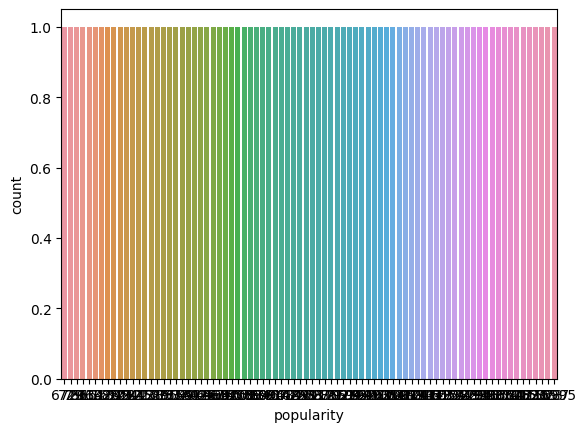

In [ ]:
#finding the number of rows and columns in the dataset
print("shape of the data is: ",a_prof_rev.shape)
#code creates a countplot that displays the frequency of each value in the 'popularity' column of the 'a_prof_rev' DataFrame
#The resulting plot will have 'popularity' values on the x-axis and the count of observations for each 'popularity' value on the y-axis
sns.countplot(x='popularity',data=a_prof_rev)
plt.show()

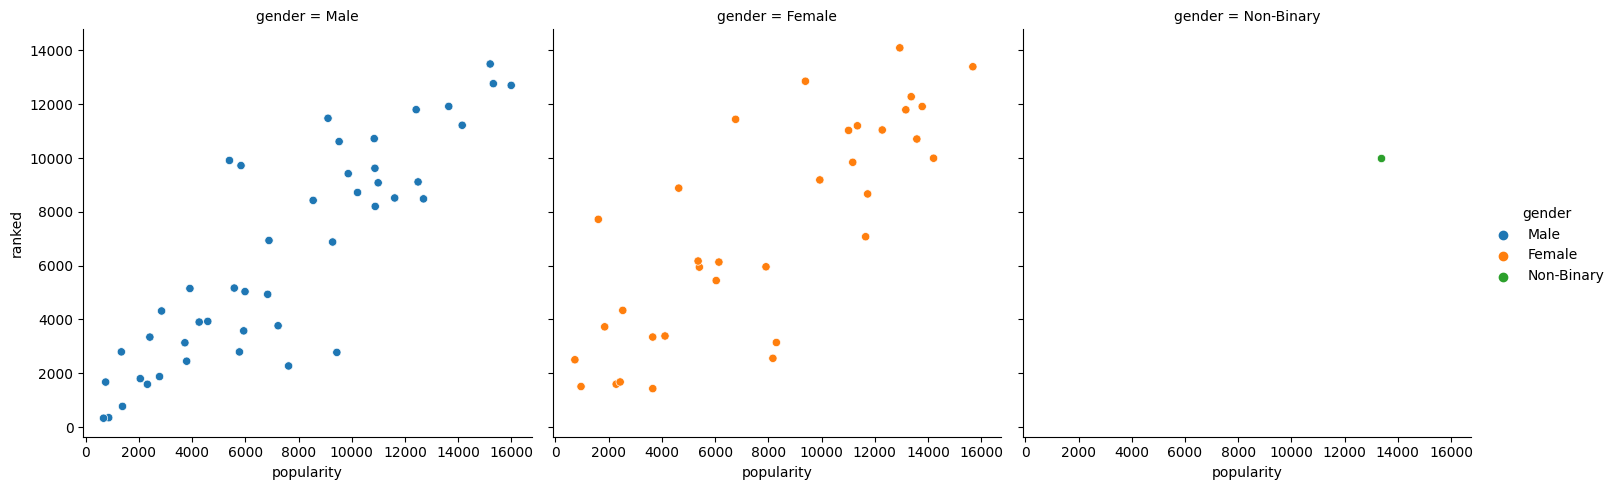

In [ ]:
#code creates a set of plots that display the relationship between 'members' and 'popularity' columns in the 'a_prof_rev' DataFrame, with separate plots for each value of 'gender'
sns.relplot(y='ranked',x='popularity',hue='gender',col='gender',data=a_prof_rev)
plt.show()

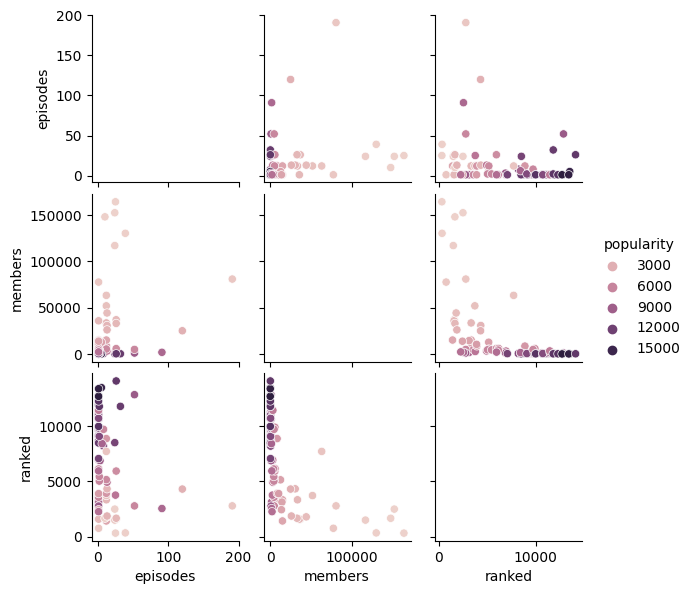

In [ ]:
#plotting multiple distributions
#pairplot that displays the pairwise relationships between the remaining columns of the 'a_prof_rev' DataFrame, with each plot showing the relationship between two columns
sns.pairplot(a_prof_rev.drop(['uid'], axis = 1),
             hue='popularity', height=2)

(array([9., 8., 7., 6., 9., 5., 6., 6., 7., 8., 5., 4.]),
 array([  672.        ,  1948.91666667,  3225.83333333,  4502.75      ,
         5779.66666667,  7056.58333333,  8333.5       ,  9610.41666667,
        10887.33333333, 12164.25      , 13441.16666667, 14718.08333333,
        15995.        ]),
 <BarContainer object of 12 artists>)

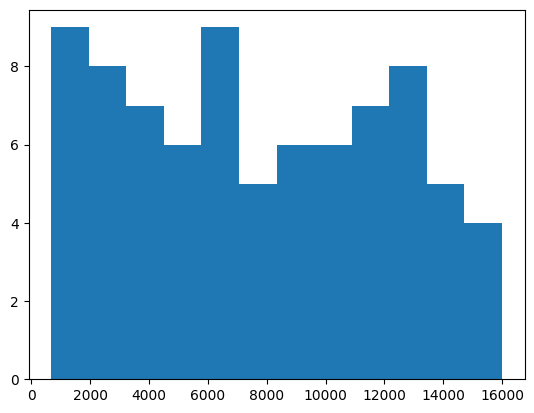

In [ ]:
#a histogram that displays the distribution of values in the 'popularity' column of the 'a_prof_rev' DataFrame, with the x-axis representing the value range and the y-axis representing the frequency or count of values in each bin.
#The histogram is divided into 12 bins based on the 'bins' argument, which represents the number of intervals the data range will be divided into.
plt.hist(a_prof_rev['popularity'], bins=12)

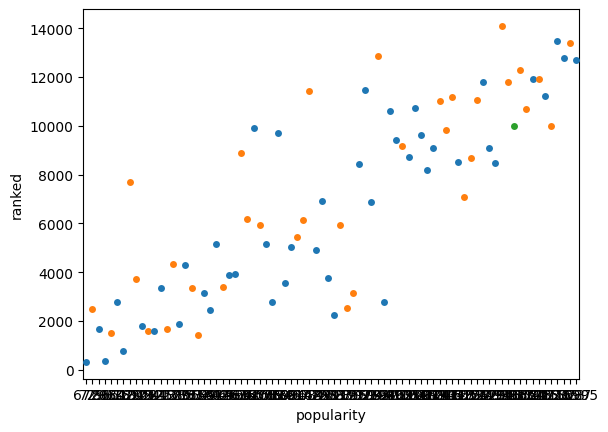

In [ ]:
#a strip plot that displays the relationship between 'members' and 'popularity' columns in the dataset
sns.stripplot(y='ranked',x='popularity', data=a_prof_rev,hue='gender',legend=False)
plt.show()

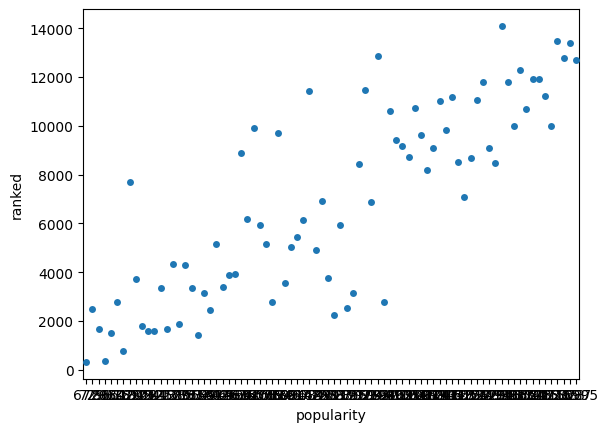

In [ ]:
#a strip plot that displays the relationship between 'members' and 'popularity' columns
#The x-axis will represent the 'popularity' values, and the y-axis will represent the 'members' values
sns.stripplot(y ='ranked', x = 'popularity', data = a_prof_rev)
plt.show()

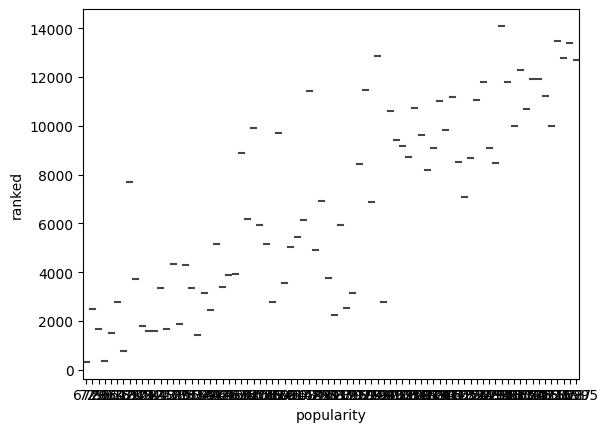

In [ ]:
#violin plot that displays the distribution of 'members' values for each 'popularity' value in the dataset
sns.violinplot(x="popularity", y="ranked", data=a_prof_rev, size=6)
plt.show()

In [ ]:
#computes the Pearson correlation coefficient between each pair of columns in the dataset
a_prof_rev.corr(method='pearson')


<ipython-input-116-65627130fe51>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,episodes,members,popularity,ranked
episodes,1.000000,0.288249,-0.304833,-0.262916
members,0.288249,1.000000,-0.653119,-0.560182
popularity,-0.304833,-0.653119,1.000000,0.846284
ranked,-0.262916,-0.560182,0.846284,1.000000


<ipython-input-117-83198d67d31c>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



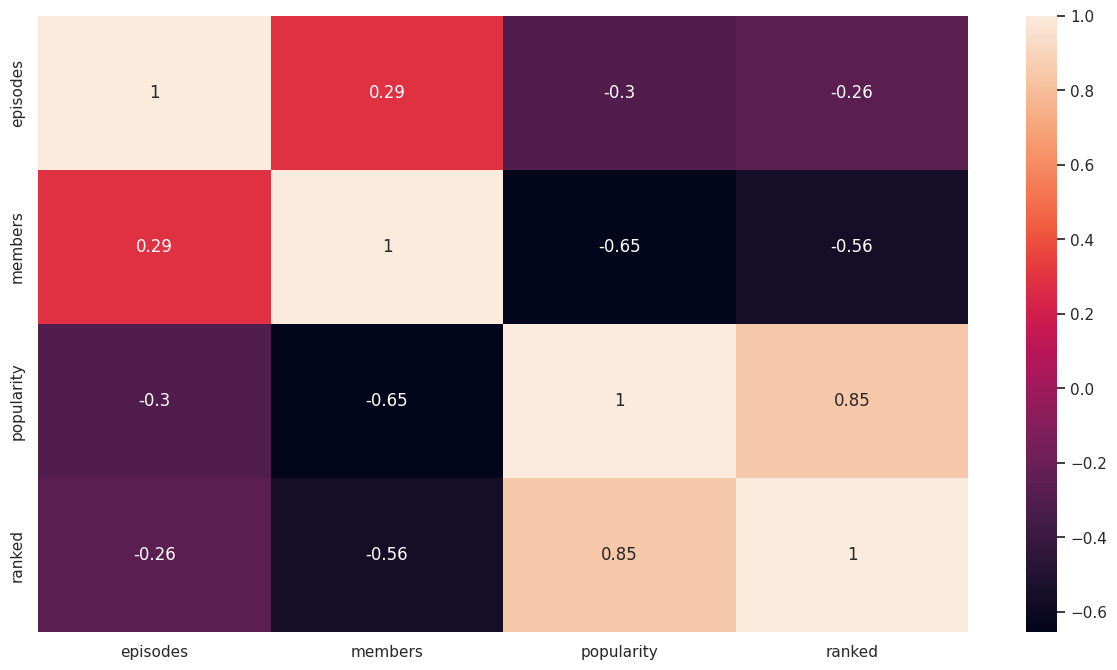

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
#a heatmap of the Pearson correlation coefficient between each pair of columns in the dataset
sns.heatmap(a_prof_rev.corr(method='pearson'), annot = True);
plt.show()

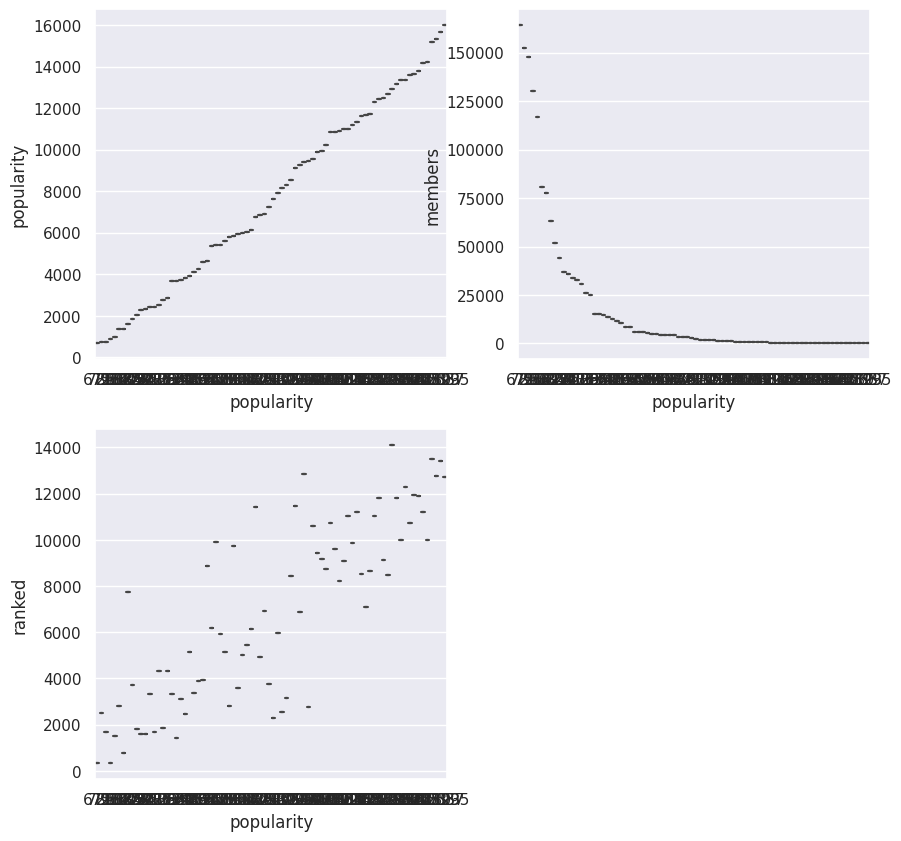

In [ ]:
def graph(y):
    # a box plot that displays the distribution of 'y' for each category of 'popularity' in the dataset
    sns.boxplot(x='popularity', y=y, data=a_prof_rev)

plt.figure(figsize=(10,10))

# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('popularity')

plt.subplot(222)
graph('members')

plt.subplot(223)
graph('ranked')


plt.show()

<Axes: xlabel='popularity'>

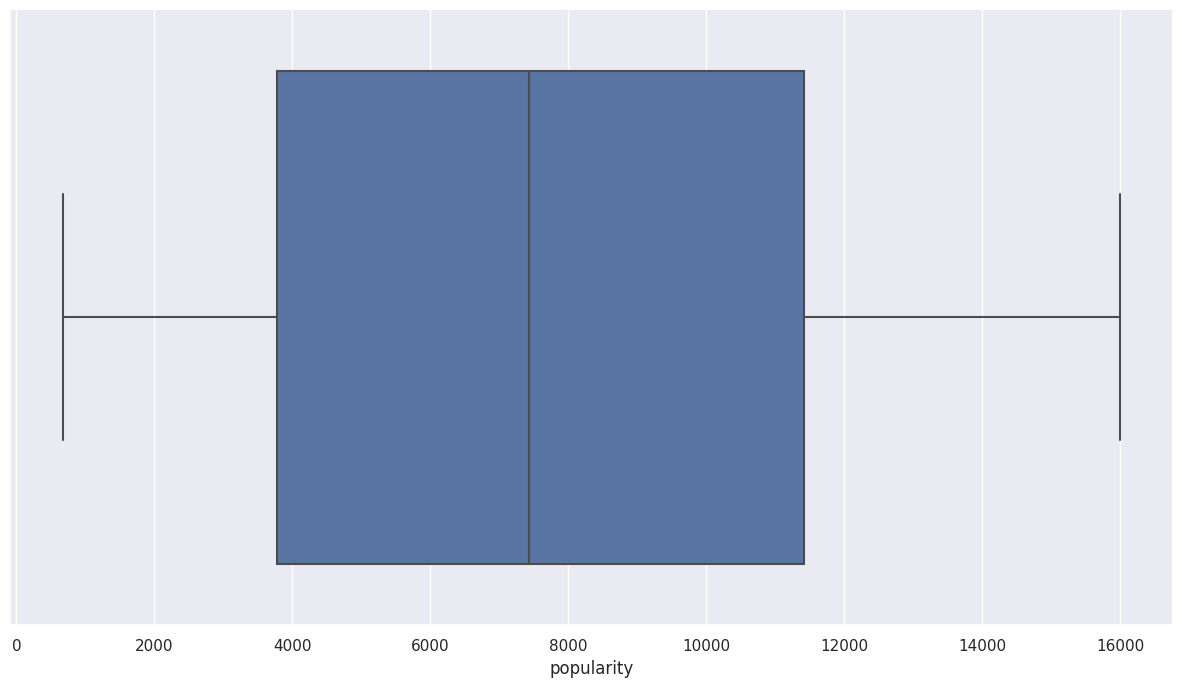

In [ ]:
#a box plot that displays the distribution of the 'popularity' variable in the dataset
sns.boxplot(x='popularity', data=a_prof_rev)

Old Shape:  (80, 12)
New Shape:  (80, 12)


<ipython-input-16-7185d9e4a8e5>:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['popularity'], 25,
<ipython-input-16-7185d9e4a8e5>:10: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['popularity'], 75,


<Axes: xlabel='popularity'>

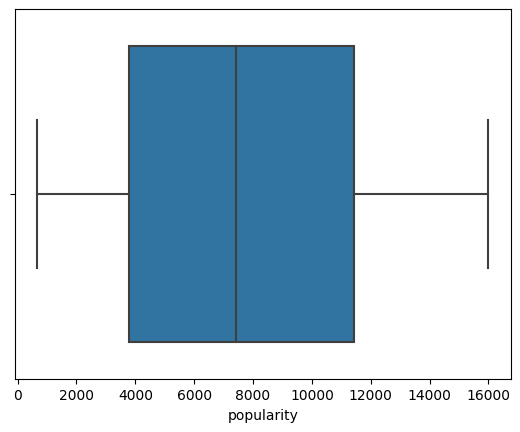

In [ ]:
#remove outliers
# IQR
df=a_prof_rev
#calculates the first quartile value of the 'popularity' column in the 'df' DataFrame using the 25th percentile
#This value represents the data point below which 25% of the data falls in the 'popularity' column.
Q1 = np.percentile(df['popularity'], 25,
                interpolation = 'midpoint')
#calculates the third quartile value of the 'popularity' column in the 'df' DataFrame using the 75th percentile
#This value represents the data point below which 75% of the data falls in the 'popularity' column.
Q3 = np.percentile(df['popularity'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['popularity'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(df['popularity'] <= (Q1-1.5*IQR))

# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
#printing the no of rows and columns after removing outliers
print("New Shape: ", df.shape)
#a box plot that displays the distribution of the 'popularity' variable in the dataset
sns.boxplot(x='popularity', data=a_prof_rev)

In [ ]:
import plotly.express as px
#a 3D scatter plot that displays the relationship between the 'popularity', 'ranked', and 'members' variables in the dataset
fig = px.scatter_3d(a_prof_rev, x='popularity', y='ranked', z='members',color='gender')
fig.show()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = a_prof_rev
#printing the first 5 rows of dataset
df.head(5)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,scores,gender,link
1,440,Shoujo Kakumei Utena,After meeting a traveling prince who consoled ...,"['Comedy', 'Drama', 'Fantasy', 'Mystery', 'Psy...","Apr 2, 1997 to Dec 24, 1997",39.0,130172,866,347.0,"{'Overall': '8', 'Story': '6', 'Animation': '1...",Male,https://myanimelist.net/profile/Lance20000
2,2581,Mobile Suit Gundam 00,"In the distant future, mankind's dependence on...","['Action', 'Military', 'Sci-Fi', 'Space', 'Dra...","Oct 6, 2007 to Mar 29, 2008",25.0,164162,672,327.0,"{'Overall': '6', 'Story': '6', 'Animation': '5...",Male,https://myanimelist.net/profile/ZetaZaku
7,9734,K-On!!: Keikaku!,"The summer holidays are coming to an end, but ...","['Comedy', 'Music', 'School', 'Slice of Life']","Mar 16, 2011",1.0,77561,1385,766.0,"{'Overall': '9', 'Story': '8', 'Animation': '8...",Male,https://myanimelist.net/profile/Cyberfire777
9,8723,Anime Rakugo Kan,A collection of 8 stand-alone stories told in ...,['Comedy'],"Jul 5, 1992 to 1992",8.0,525,10884,8200.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",Male,https://myanimelist.net/profile/Greiver
11,15743,Yuugen Kaisha: Jiken File 00 - Hajimari wa Aya...,Prologue episode. The first half features main...,"['Adventure', 'Comedy', 'Supernatural']","Jul 25, 1994",1.0,530,10872,9618.0,"{'Overall': '8', 'Story': '8', 'Animation': '9...",Male,https://myanimelist.net/profile/alex264


In [ ]:
x = df['popularity'].values
y = df['ranked'].values
print(f'Anime Popularity: {x}')
print(f'Anime Members: {y}')

Anime Popularity: [  866   672  1385 10884 10872  9869  4116  9935  3654  2413 12494  4632
 10219 11732 11615 12698  8551  3730  8302 10994  5940  1849  7233  2281
  2321  4590   960  4267  3656  2529  2853  5405 11172  5839 14153 11348
 12282 11016  2054  9527  6841 14210 13366 13581 10846  3919  9109  5586
  6770  5990 13647 13783 12423 13167  2431   751 13370  2777  6041  5408
  9394 15323 15995 15205 15687 12941  6891  9282  5360  6142  7912  1342
  5780  9441 11657  1610  8171   729  3796  7627]
Anime Members: [  347.   327.   766.  8200.  9618.  9419.  3383.  9185.  3344.  3342.
  9111.  8880.  8718.  8664.  8514.  8481.  8424.  3132.  3141.  9079.
  3574.  3724.  3765.  1592.  1588.  3926.  1505.  3901.  1427.  4335.
  4313.  9909.  9840.  9719. 11217. 11198. 11042. 11026.  1798. 10611.
  4932.  9992.  9983. 10706. 10721.  5149. 11477.  5165. 11438.  5034.
 11918. 11914. 11798. 11792.  1674.  1670. 12279.  1874.  5444.  5943.
 12854. 12764. 12700. 13495. 13393. 14095.  6934.  68

In [ ]:
#reshaping the arrays
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
print(x)
print(y)
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=.8, test_size=.2, random_state=100)
#finding the no of rows and columns(shape)
print(f'x Train Data Shape{x_train.shape}')
print(f'y Train Data Shape{y_train.shape}')
print(f'x Test Data Shape{x_test.shape}')
print(f'y Test Data Shape{y_test.shape}')

[[  866]
 [  672]
 [ 1385]
 [10884]
 [10872]
 [ 9869]
 [ 4116]
 [ 9935]
 [ 3654]
 [ 2413]
 [12494]
 [ 4632]
 [10219]
 [11732]
 [11615]
 [12698]
 [ 8551]
 [ 3730]
 [ 8302]
 [10994]
 [ 5940]
 [ 1849]
 [ 7233]
 [ 2281]
 [ 2321]
 [ 4590]
 [  960]
 [ 4267]
 [ 3656]
 [ 2529]
 [ 2853]
 [ 5405]
 [11172]
 [ 5839]
 [14153]
 [11348]
 [12282]
 [11016]
 [ 2054]
 [ 9527]
 [ 6841]
 [14210]
 [13366]
 [13581]
 [10846]
 [ 3919]
 [ 9109]
 [ 5586]
 [ 6770]
 [ 5990]
 [13647]
 [13783]
 [12423]
 [13167]
 [ 2431]
 [  751]
 [13370]
 [ 2777]
 [ 6041]
 [ 5408]
 [ 9394]
 [15323]
 [15995]
 [15205]
 [15687]
 [12941]
 [ 6891]
 [ 9282]
 [ 5360]
 [ 6142]
 [ 7912]
 [ 1342]
 [ 5780]
 [ 9441]
 [11657]
 [ 1610]
 [ 8171]
 [  729]
 [ 3796]
 [ 7627]]
[[  347.]
 [  327.]
 [  766.]
 [ 8200.]
 [ 9618.]
 [ 9419.]
 [ 3383.]
 [ 9185.]
 [ 3344.]
 [ 3342.]
 [ 9111.]
 [ 8880.]
 [ 8718.]
 [ 8664.]
 [ 8514.]
 [ 8481.]
 [ 8424.]
 [ 3132.]
 [ 3141.]
 [ 9079.]
 [ 3574.]
 [ 3724.]
 [ 3765.]
 [ 1592.]
 [ 1588.]
 [ 3926.]
 [ 1505.]
 [ 3901.]

<function matplotlib.pyplot.show(close=None, block=None)>

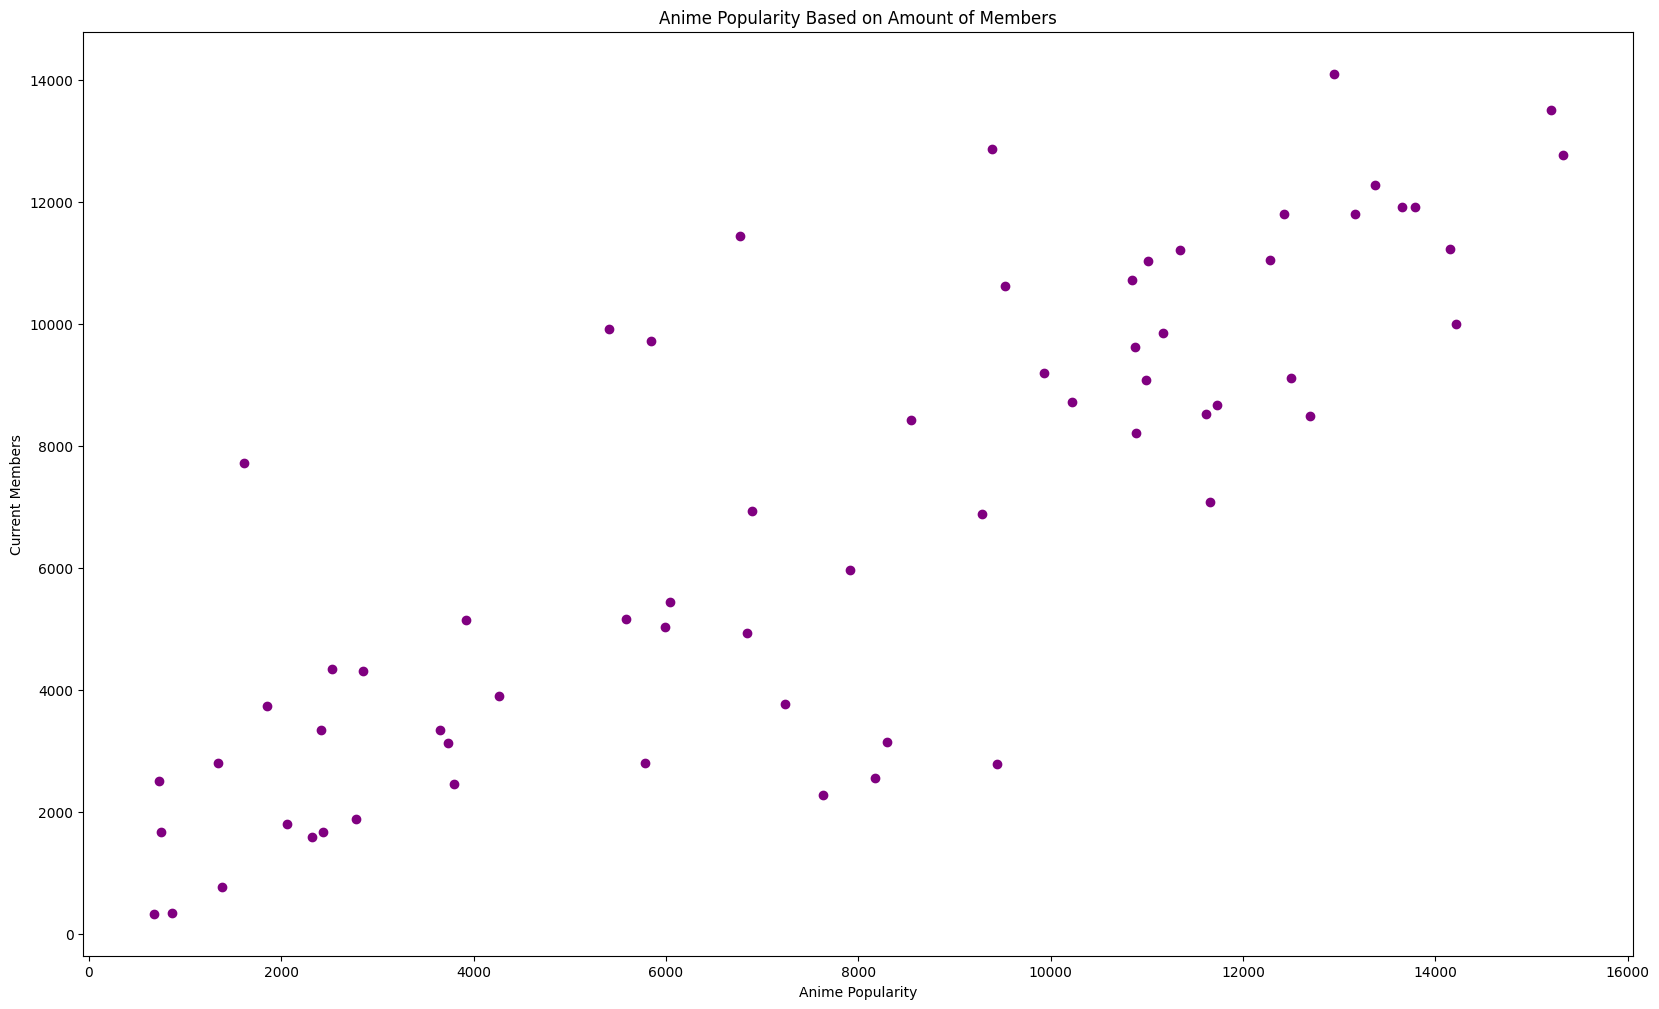

In [ ]:
plt.rcParams['figure.figsize'] = [20,12]
#scatter plot between current members and anime popularity
plt.scatter(x_train, y_train, color='purple')
plt.ylabel('Current Members')
plt.xlabel('Anime Popularity')
plt.title('Anime Popularity Based on Amount of Members')
plt.show

In [ ]:
#Training and predicting the data
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)
print(f'Train Accuracy: {round(lm.score(x_train, y_train)*100,2)}%')
print(f'Predictive Data Accuracy: {round(lm.score(x_test, y_test)*100,2)}%')

Train Accuracy: 69.26%
Predictive Data Accuracy: 80.78%


<function matplotlib.pyplot.show(close=None, block=None)>

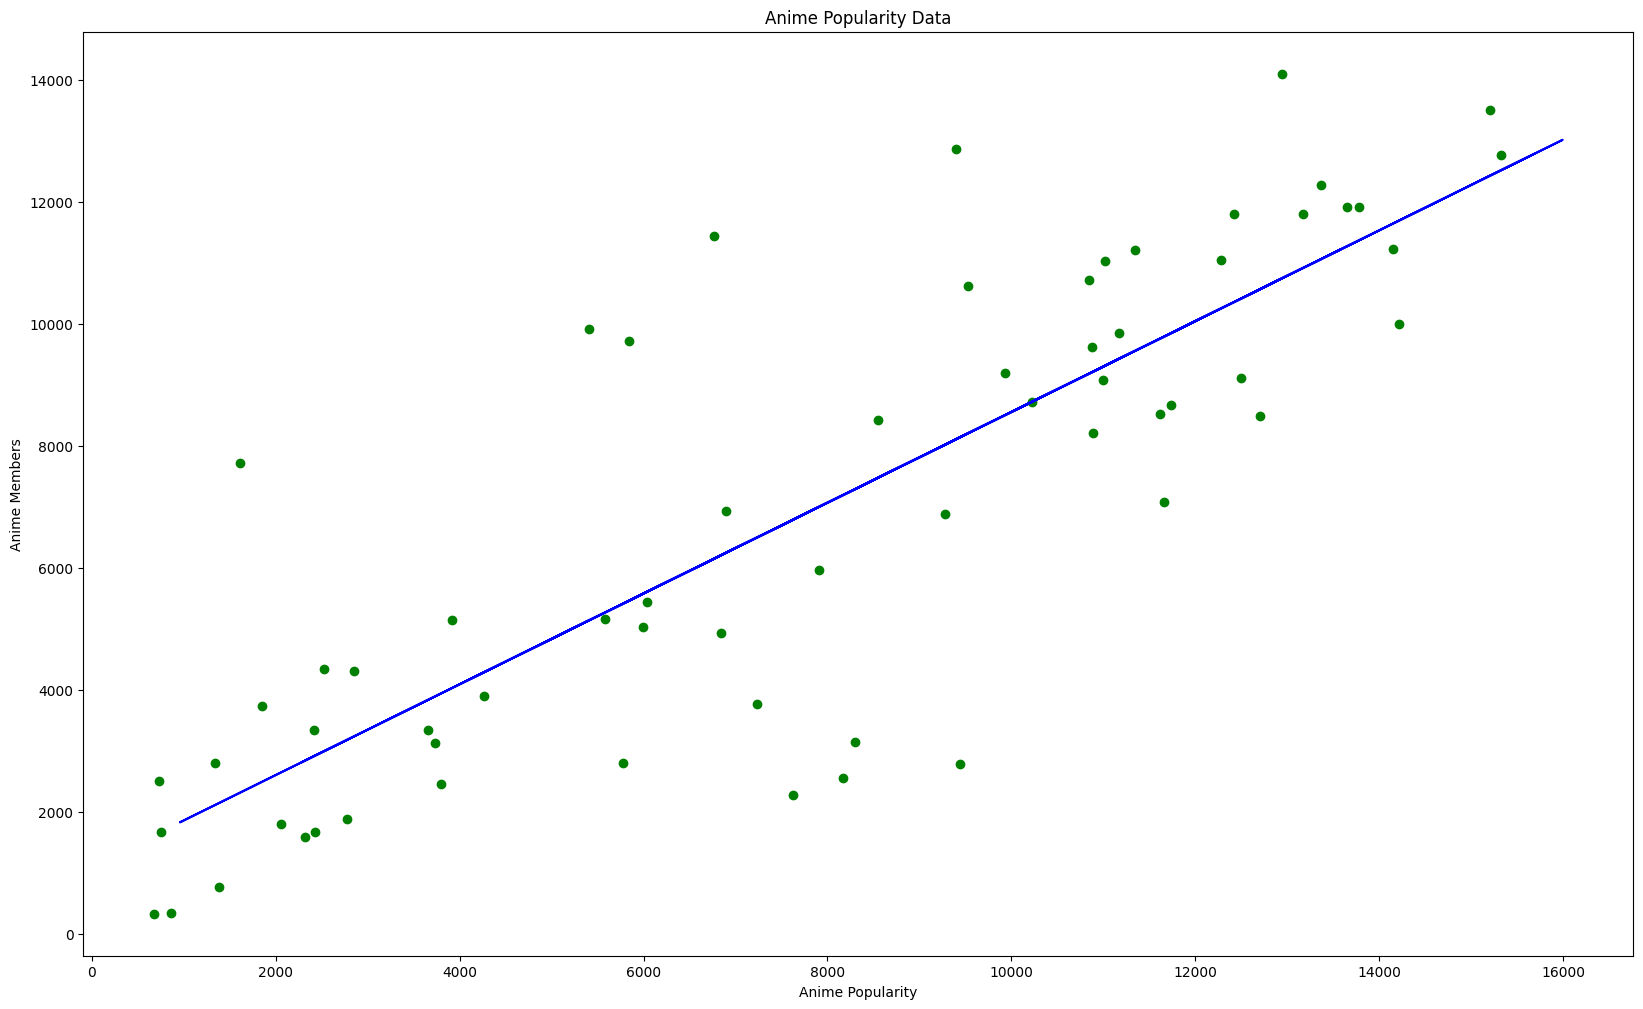

In [ ]:
#Scatter plot
plt.scatter(x_train, y_train, color = 'green')
plt.plot(x_test, y_predict, color = 'blue')
plt.ylabel('Anime Members')
plt.xlabel('Anime Popularity')
plt.title('Anime Popularity Data')
plt.show

In [ ]:
from sklearn.metrics import r2_score

# Select independent and dependent variables
X = a_prof_rev[['members', 'ranked']]
y = a_prof_rev['popularity']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values using the model
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

print("R-squared:",r_squared)

R-squared: 0.7629140070799311


In [ ]:
#implementation of linear regression model
import statsmodels.api as sm
x = df['popularity'].values
y = df['members'].values

y = y.reshape(-1,1)
X1=sm.add_constant(x)
model1 = sm.OLS(y,X1).fit()
model1.summary(xname=['intercept','popularity'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     58.02
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           5.17e-11
Time:                        15:19:32   Log-Likelihood:                -931.64
No. Observations:                  80   AIC:                             1867.
Df Residuals:                      78   BIC:                             1872.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.934e+04   6251.630      9.491      0.000    4.69e+04    7.18e+04
popularity    -5.3615      0.704     -7.617      0.000      -6.763      -3.960
==============================================================================
Omnibus:                       46.956   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.004
Skew:                           2.037   Prob(JB):                     9.71e-29
Kurtosis:                       7.701   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""